<a href="https://colab.research.google.com/github/amina04/CNN-lstm/blob/main/CNN_cicids2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd  
import tensorflow as tf

In [3]:
d1=pd.read_csv('/content/drive/MyDrive/data/cicids-2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
d2=pd.read_csv('/content/drive/MyDrive/data/cicids-2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
d3=pd.read_csv('/content/drive/MyDrive/data/cicids-2017/Friday-WorkingHours-Morning.pcap_ISCX.csv')
d4=pd.read_csv('/content/drive/MyDrive/data/cicids-2017/Monday-WorkingHours.pcap_ISCX.csv')
d5=pd.read_csv('/content/drive/MyDrive/data/cicids-2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
d6=pd.read_csv('/content/drive/MyDrive/data/cicids-2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
d7=pd.read_csv('/content/drive/MyDrive/data/cicids-2017/Wednesday-workingHours.pcap_ISCX.csv')
d8=pd.read_csv('/content/drive/MyDrive/data/cicids-2017/Tuesday-WorkingHours.pcap_ISCX.csv')


In [4]:
data=pd.concat([d1,d2,d3,d4,d5,d6,d7,d8])
data.shape

(2830743, 79)

In [5]:
data=pd.concat([d1,d2,d3,d4,d5,d6,d7,d8]).drop_duplicates(keep=False)
data.reset_index(drop=True, inplace = True)

In [6]:
del d1,d2,d3,d4,d5,d6,d7

In [7]:
data.shape

(2427193, 79)

In [8]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427193 entries, 0 to 2427192
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [10]:
data.columns
print(data[' Label'].unique())
len(data[' Label'].unique())

['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration'
 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'DoS slowloris' 'DoS Slowhttptest'
 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed' 'FTP-Patator' 'SSH-Patator']


15

**Data Cleaning**
This chapter contains data cleaning code. We go through the process of renaming columns, removing NaN and non-finite values (-inf, inf) to get the data ready for visualization and model training.

In [11]:
# Removing whitespaces in column names.
#renommer les colonnes
col_names = [col.replace(' ', '') for col in data.columns]
data.columns = col_names
data.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [12]:
data.columns
print(data['Label'].unique())
len(data['Label'].unique())

['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration'
 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'DoS slowloris' 'DoS Slowhttptest'
 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed' 'FTP-Patator' 'SSH-Patator']


15

In [13]:
# Here we can see that 'Label' column contains some wierd characters. 

data["Label"].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'DoS slowloris', 'DoS Slowhttptest',
       'DoS Hulk', 'DoS GoldenEye', 'Heartbleed', 'FTP-Patator',
       'SSH-Patator'], dtype=object)

In [14]:
# This next snippet uses regular expressions to replace wierd characters with dunders.

label_names = data['Label'].unique()


import re

label_names = [re.sub("[^a-zA-Z ]+", "", l) for l in label_names]
label_names = [re.sub("[\s\s]", '_', l) for l in label_names]
label_names = [lab.replace("__", "_") for lab in label_names]

label_names, len(label_names)

(['BENIGN',
  'DDoS',
  'PortScan',
  'Bot',
  'Infiltration',
  'Web_Attack_Brute_Force',
  'Web_Attack_XSS',
  'Web_Attack_Sql_Injection',
  'DoS_slowloris',
  'DoS_Slowhttptest',
  'DoS_Hulk',
  'DoS_GoldenEye',
  'Heartbleed',
  'FTPPatator',
  'SSHPatator'],
 15)

In [15]:
# Replacing 'Label' column values with new readable values.

labels = data['Label'].unique()

for i in range(0,len(label_names)):
    data['Label'] = data['Label'].replace({labels[i] : label_names[i]})  
data['Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web_Attack_Brute_Force', 'Web_Attack_XSS',
       'Web_Attack_Sql_Injection', 'DoS_slowloris', 'DoS_Slowhttptest',
       'DoS_Hulk', 'DoS_GoldenEye', 'Heartbleed', 'FTPPatator',
       'SSHPatator'], dtype=object)

In [16]:
# Checking if there are any NULL values in the dataset.

data.isnull().values.any()

True

In [17]:
# Checking which column/s contain NULL values.

[col for col in data if data[col].isnull().values.any()]

['FlowBytes/s']

In [18]:
# Checking how many NULL values it this column contains.

data['FlowBytes/s'].isnull().sum()

334

In [19]:
# Removing rows that contain NULL values and checking if number of removed rows is equal to the number of null values.

before = data.shape
data.dropna(inplace=True)
after = data.shape
before[0] - after[0]

334

In [20]:
data.isnull().any().any()

False

**Removing non-finite values**

In [21]:
import numpy as np

In [22]:
labl = data['Label']
data = data.loc[:, data.columns != 'Label'].astype('float64')

In [23]:
# Checking if all values are finite.
np.all(np.isfinite(data))

False

In [24]:
# Checking what column/s contain non-finite values.

nonfinite = [col for col in data if not np.all(np.isfinite(data[col]))]
nonfinite

['FlowBytes/s', 'FlowPackets/s']

In [25]:
# Checking how many non-finite values each column contains.

finite= np.isfinite(data['FlowBytes/s']).sum()
data.shape[0] - finite

1132

In [26]:
# Checking how many non-finite values each column contains.

finite= np.isfinite(data['FlowPackets/s']).sum()
data.shape[0] - finite

1132

In [27]:
# Same as before, since there is a small number of non-finite values we can safely remove them from the dataset
# without spoiling the dataset.

# Replacing infinite values with NaN values.
data = data.replace([np.inf,-np.inf],np.nan)

In [28]:
# We can see that now we have Nan values again.

np.any(np.isnan(data))

True

In [29]:
# Bringing the Labels back into the dataset before deliting Nan rows.

data = data.merge(labl, how='outer', left_index=True, right_index=True)

In [30]:
# Removing new NaN values.

before = data.shape
data.dropna(inplace=True)
after = data.shape
before[0] - after[0]

1132

In [31]:
data.shape

(2425727, 79)

**Data preparation**

In [32]:
# Splitting dataset into features and labels.

labels = data['Label']
features = data.loc[:, data.columns != 'Label'].astype('float64')

In [33]:
labels.head()
i=0
for row in labels:
  if row!='BENIGN':
    i+=1
print(i)

390222


In [34]:
# For scaling the data, we use RobustScaler class from sklearn.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = scaler.fit_transform(features)


In [35]:
# Checking if scaling has been succesful.
features[0]

array([8.37186236e-01, 1.33333321e-07, 4.55046005e-06, 0.00000000e+00,
       9.30232558e-07, 0.00000000e+00, 2.41740532e-04, 2.58064516e-03,
       1.00995527e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.13636364e-01, 4.44444444e-01,
       1.33333319e-07, 0.00000000e+00, 1.33333319e-07, 1.41666650e-07,
       2.50000000e-08, 2.50000000e-08, 0.00000000e+00, 2.50000000e-08,
       1.24999988e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.99855825e-01, 9.94591933e-01,
       2.22222222e-01, 0.00000000e+00, 4.14364641e-03, 2.41740532e-04,
       1.79794521e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.31164384e-03, 1.00995527e-03, 0.00000000e+00, 9.99855825e-01,
      

**Label encoding**

In [36]:
#multiclass
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(labels)
labels = LE.transform(labels)
# Labels have been replaced with integers.
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [37]:
#binary
for i in range(len(labels)):
 if labels[i]==0:
   labels[i]=0
 else :
   labels[i]=1
np.unique(labels)
labels=pd.get_dummies(labels)
labels = scaler.fit_transform(labels)
labels[0]

array([1., 0.])

**Splitting the data**
Final step to data preparation is splitting the data into traning and testing sets. For this there already exists sklearn function that does all the splitting for us. This step is important so we can have representative data for evaluating our model. Both train and test samples should contain similar data variance.

In [38]:
from sklearn.model_selection import train_test_split
# The next step is to split training and testing data. For this we will use sklearn function train_test_split().

x_train, x_valid, y_train, y_valid = train_test_split(features, labels, test_size=.2)

x_train.shape,x_valid.shape, y_train.shape, y_valid.shape

((1940581, 78), (485146, 78), (1940581, 2), (485146, 2))

In [39]:
#instancier le modéle
from tensorflow.keras.models import Sequential
model=Sequential()
#Créer la couche entrée totalement connecté avec la couche dense
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, AveragePooling1D,BatchNormalization,SpatialDropout1D,MaxPool1D
from tensorflow.keras.layers import LeakyReLU

In [40]:
model.add(Conv1D(32,kernel_size =5,padding="same",input_shape =(x_train.shape[1],1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(AveragePooling1D(pool_size=2))
#model.add(SpatialDropout1D(0.1))
#model.add(Dropout(0.1))
# #2em block
model.add(Conv1D(64,kernel_size =5,padding="same",))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(AveragePooling1D(pool_size=2))
model.add(SpatialDropout1D(0.2))
#model.add(Dropout(0.1))
#3em block
model.add(Conv1D(128,kernel_size =5,padding="same",))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(AveragePooling1D(pool_size=2))
#model.add(SpatialDropout1D(0.1))
#model.add(Dropout(0.1))
#4em block
model.add(Conv1D(256,kernel_size =5,padding="same",))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(AveragePooling1D(pool_size=2))
model.add(SpatialDropout1D(0.2))
#model.add(Dropout(0.1))
#5em block
# model.add(Conv1D(512,kernel_size =5,padding="same",))
# model.add(LeakyReLU(alpha=0.1))
# model.add(BatchNormalization())
# model.add(AveragePooling1D(pool_size=2))
# model.add(Dropout(0.2))



model.add(Flatten())
model.add(Dense(units=30, activation="relu"))

#model.add(Dropout(0.3))
#model.add(LeakyReLU(alpha=0.1))
model.add(Dense(2,activation="sigmoid"))
model.summary() #sert afficher résumés

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 78, 32)            192       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 78, 32)            0         
                                                                 
 batch_normalization (BatchN  (None, 78, 32)           128       
 ormalization)                                                   
                                                                 
 average_pooling1d (AverageP  (None, 39, 32)           0         
 ooling1D)                                                       
                                                                 
 conv1d_1 (Conv1D)           (None, 39, 64)            10304     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 39, 64)            0

In [41]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy',keras.metrics.Precision()])

In [42]:
#model.fit(x_train, y_train, epochs = 100, batch_size =1000)
#model.fit(x_train, y_train, epochs =80,batch_size =128,validation_data=(x_valid, y_valid),callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1))
from keras.callbacks import EarlyStopping
#history = model.fit(x_train, y_train, epochs =80,batch_size =128,validation_data=(x_valid, y_valid),callbacks = [EarlyStopping(monitor='val_loss', patience=5)])
history = model.fit(x_train, y_train, epochs =100,batch_size =5000,validation_data=(x_valid, y_valid))


Epoch 1/100
389/389 [==============================] - 99s 218ms/step - loss: 0.1365 - accuracy: 0.9442 - precision: 0.9434 - val_loss: 0.2925 - val_accuracy: 0.9378 - val_precision: 0.9577
Epoch 2/100
389/389 [==============================] - 88s 226ms/step - loss: 0.0730 - accuracy: 0.9687 - precision: 0.9683 - val_loss: 0.0661 - val_accuracy: 0.9688 - val_precision: 0.9665
Epoch 3/100
389/389 [==============================] - 84s 216ms/step - loss: 0.0626 - accuracy: 0.9712 - precision: 0.9708 - val_loss: 0.0563 - val_accuracy: 0.9731 - val_precision: 0.9715
Epoch 4/100
389/389 [==============================] - 84s 216ms/step - loss: 0.0565 - accuracy: 0.9732 - precision: 0.9730 - val_loss: 0.0536 - val_accuracy: 0.9747 - val_precision: 0.9748
Epoch 5/100
389/389 [==============================] - 88s 227ms/step - loss: 0.0518 - accuracy: 0.9751 - precision: 0.9750 - val_loss: 0.0591 - val_accuracy: 0.9753 - val_precision: 0.9752
Epoch 6/100
389/389 [=============================

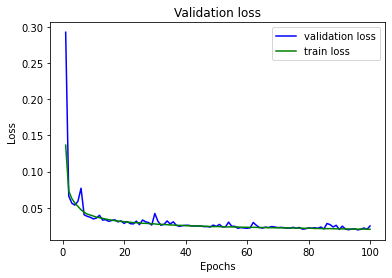

In [43]:
import matplotlib.pyplot as plt
import tensorflow as tf

loss_val = history.history['val_loss']
acc_val = history.history['loss']
epochs = range(1,101)
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.plot(epochs, acc_val, 'g', label='train loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

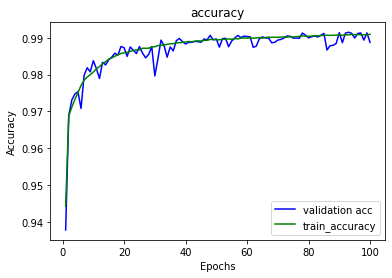

In [44]:
acc_val = history.history['val_accuracy']
acc_train = history.history['accuracy']
epochs = range(1,101)
plt.plot(epochs, acc_val, 'b', label='validation acc')
plt.plot(epochs, acc_train, 'g', label='train_accuracy')
plt.title('accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()